<h1 style="text-align: center">Experimentación</h1>

<h2>Integrantes: <h2>

- Jackson Vera Pineda     C-312
- Kevin Manzano Rodríguez C-312
- Roger Fuentes Rodríguez C-312

## Dependencias del estudio
Fueron usadas las bibliotecas siguientes para todo el posterior análisis:

In [22]:
import numpy as np                  # Para el trabajo numérico y vectorial
import scipy.stats as st            # Para las pruebas estadísticas
import pandas as pd                 # Para el trabajo con datos
import matplotlib.pyplot as plt     # Para la generación de gráficos
import seaborn as sns               # Para la visualización de datos

from simulation import  Person,simulate  # Importamos las clases y funciones necesarias desarrolladas por el equipo

## Preguntas
- Cual es la media de la cantidad de tareas resultas siguiendo cada estrategia?

- Comparar que estrategia de administración de tiempo es mas productiva?
  - 24-6
  - 12-3
  - Free

- ¿Cuál es la distribución de la cantidad de tareas completadas en la ventana de tiempo de 480 minutos? Esto te permitiría entender cuánto varía el rendimiento de la persona.

- ¿Cómo afecta la duración de los descansos a la cantidad de tareas completadas? Podrías comparar las simulaciones con diferentes duraciones de descanso para ver si hay alguna diferencia significativa.

- ¿Cómo afectan las interrupciones a la cantidad de tareas completadas? Similar a la pregunta anterior, podrías comparar las simulaciones con y sin interrupciones.

- ¿Cuál es la distribución del tiempo entre tareas completadas? Esto te permitiría entender cómo se distribuye el tiempo de trabajo de la persona.

- ¿Cómo se correlacionan el número de descansos y el número de tareas completadas? Esto podría ayudarte a entender si tomar más descansos lleva a completar más tareas.

## Extracción de Datos

Se generan los datos de la simulación teniendo en cuenta cada variante de cada grupo de interes:
- La partícula `df` es el nombre estándar para la estructura de datos DataFrame de la bilioteca **Pandas**.
- La partícula `rand` es para distinguir las simulaciones en las cuales los tiempos de descanso y sus duraciones son gestionados aleatoriamente.
- Las particulas `n_m` ejemplo `12-3` son usadas para distinguir las simulaciones en las cuales se usa una metodología fija de planificación de los descansos, `n` denota cada cuánto tiempo se descansa y `m` cual es la duración del descanso.
- Las partículas `i` y `ni` se usan cuando las iteraciones son simuladas o no con interrupciones, respectivamente.

En tal sentido, las combinaciones de estas particulas denotan variaciones de condiciones de la simulaciones, son omitidas en los casos generales ej: `df` es el conjunto de todas las simulaciones.

El parámetro booleano `likelihood` de la función designa si se comprobara o no la significncia de las simulaciones, que tanto se aleja el estimador muestral del poblacional, y esto se comprueba cuando $\sigma / \sqrt{k} < c$ donde el $c$ es el error que se esta dispuesto a cometer (la mitad de la longitud del intervalo de confianza) con 95% de certeza.

In [72]:


df_rand_i = simulate(30, 480,likelihood=True)
df_24_6_i = simulate(30, 480, 24, 6, likelihood=True)
df_12_3_i = simulate(30, 480, 12, 3, likelihood=True)

df_rand_ni = simulate(30, 480, interruptions=False, likelihood=True)
df_24_6_ni = simulate(30, 480, 24, 6, interruptions=False, likelihood=True)
df_12_3_ni = simulate(30, 480, 12, 3, interruptions=False, likelihood=True)

df_i  = pd.concat([df_rand_i, df_24_6_i, df_12_3_i])
df_ni = pd.concat([df_rand_ni, df_24_6_ni, df_12_3_ni])

df = pd.concat([df_i, df_ni])

Exception ignored in: <generator object Person.working at 0x14af78c10>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/blocks.py", line 2721, in new_block
    return klass(values, ndim=ndim, placement=placement, refs=refs)
RuntimeError: generator ignored GeneratorExit
Exception ignored in: <generator object Person.working at 0x14af79000>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/numeric.py", line 1380, in normalize_axis_tuple
    axis = tuple([normalize_axis_index(ax, ndim, argname) for ax in axis])
RuntimeError: generator ignored GeneratorExit
Exception ignored in: <generator object Person.working at 0x14af791c0>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/managers.py", line 985, in fast_xs
    dtype

## Pre-Visualización

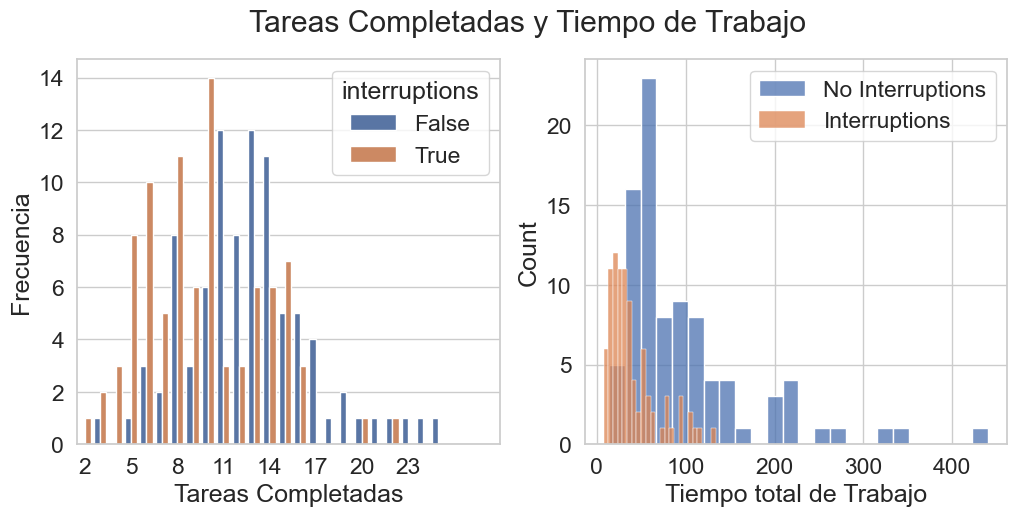

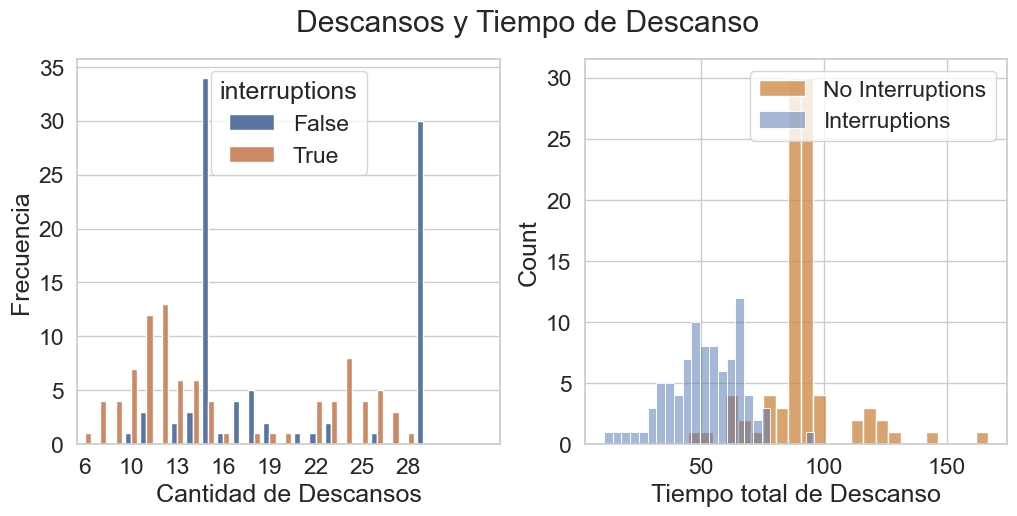

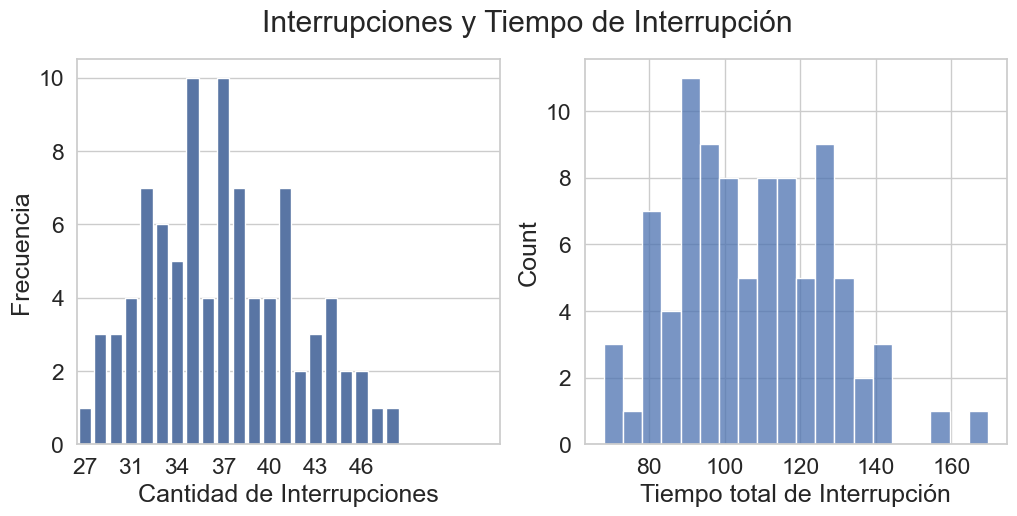

In [141]:

df['time'] = df['working_time'] + df['break_time'] + df['interruption_time']

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.countplot(x = df['completed_tasks'], ax=ax[0], hue=df['interruptions'] > 0)
sns.histplot(data = df_ni['working_time'], bins=24, ax=ax[1])
sns.histplot(data = df_i['working_time'], bins=24, ax=ax[1])
plt.legend(['No Interruptions', 'Interruptions'])
ax[0].set_xlabel('Tareas Completadas')
ax[1].set_xlabel('Tiempo total de Trabajo')
ax[0].set_ylabel('Frecuencia')
ax[0].set_xticks(range(0, 30,3))
fig.suptitle('Tareas Completadas y Tiempo de Trabajo')
plt.show()

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.countplot(x = df['breaks'], ax=ax[0], hue=df['interruptions'] > 0)
sns.histplot(data = df_ni['break_time'], bins=24, ax=ax[1], color='peru')
sns.histplot(data = df_i['break_time'], bins=24, ax=ax[1], alpha=0.5)

plt.legend(['No Interruptions', 'Interruptions'])
ax[0].set_xlabel('Cantidad de Descansos')
ax[1].set_xlabel('Tiempo total de Descanso')
ax[0].set_ylabel('Frecuencia')
ax[0].set_xticks(range(0, 30,3))
fig.suptitle('Descansos y Tiempo de Descanso')
plt.show()

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.countplot(x = df_i['interruptions'], ax=ax[0])
sns.histplot(data =df_i['interruption_time'], bins=20, ax=ax[1])

ax[0].set_xlabel('Cantidad de Interrupciones')
ax[1].set_xlabel('Tiempo total de Interrupción')
ax[0].set_ylabel('Frecuencia')
ax[0].set_xticks(range(0, 30,3))
fig.suptitle('Interrupciones y Tiempo de Interrupción')
plt.show()


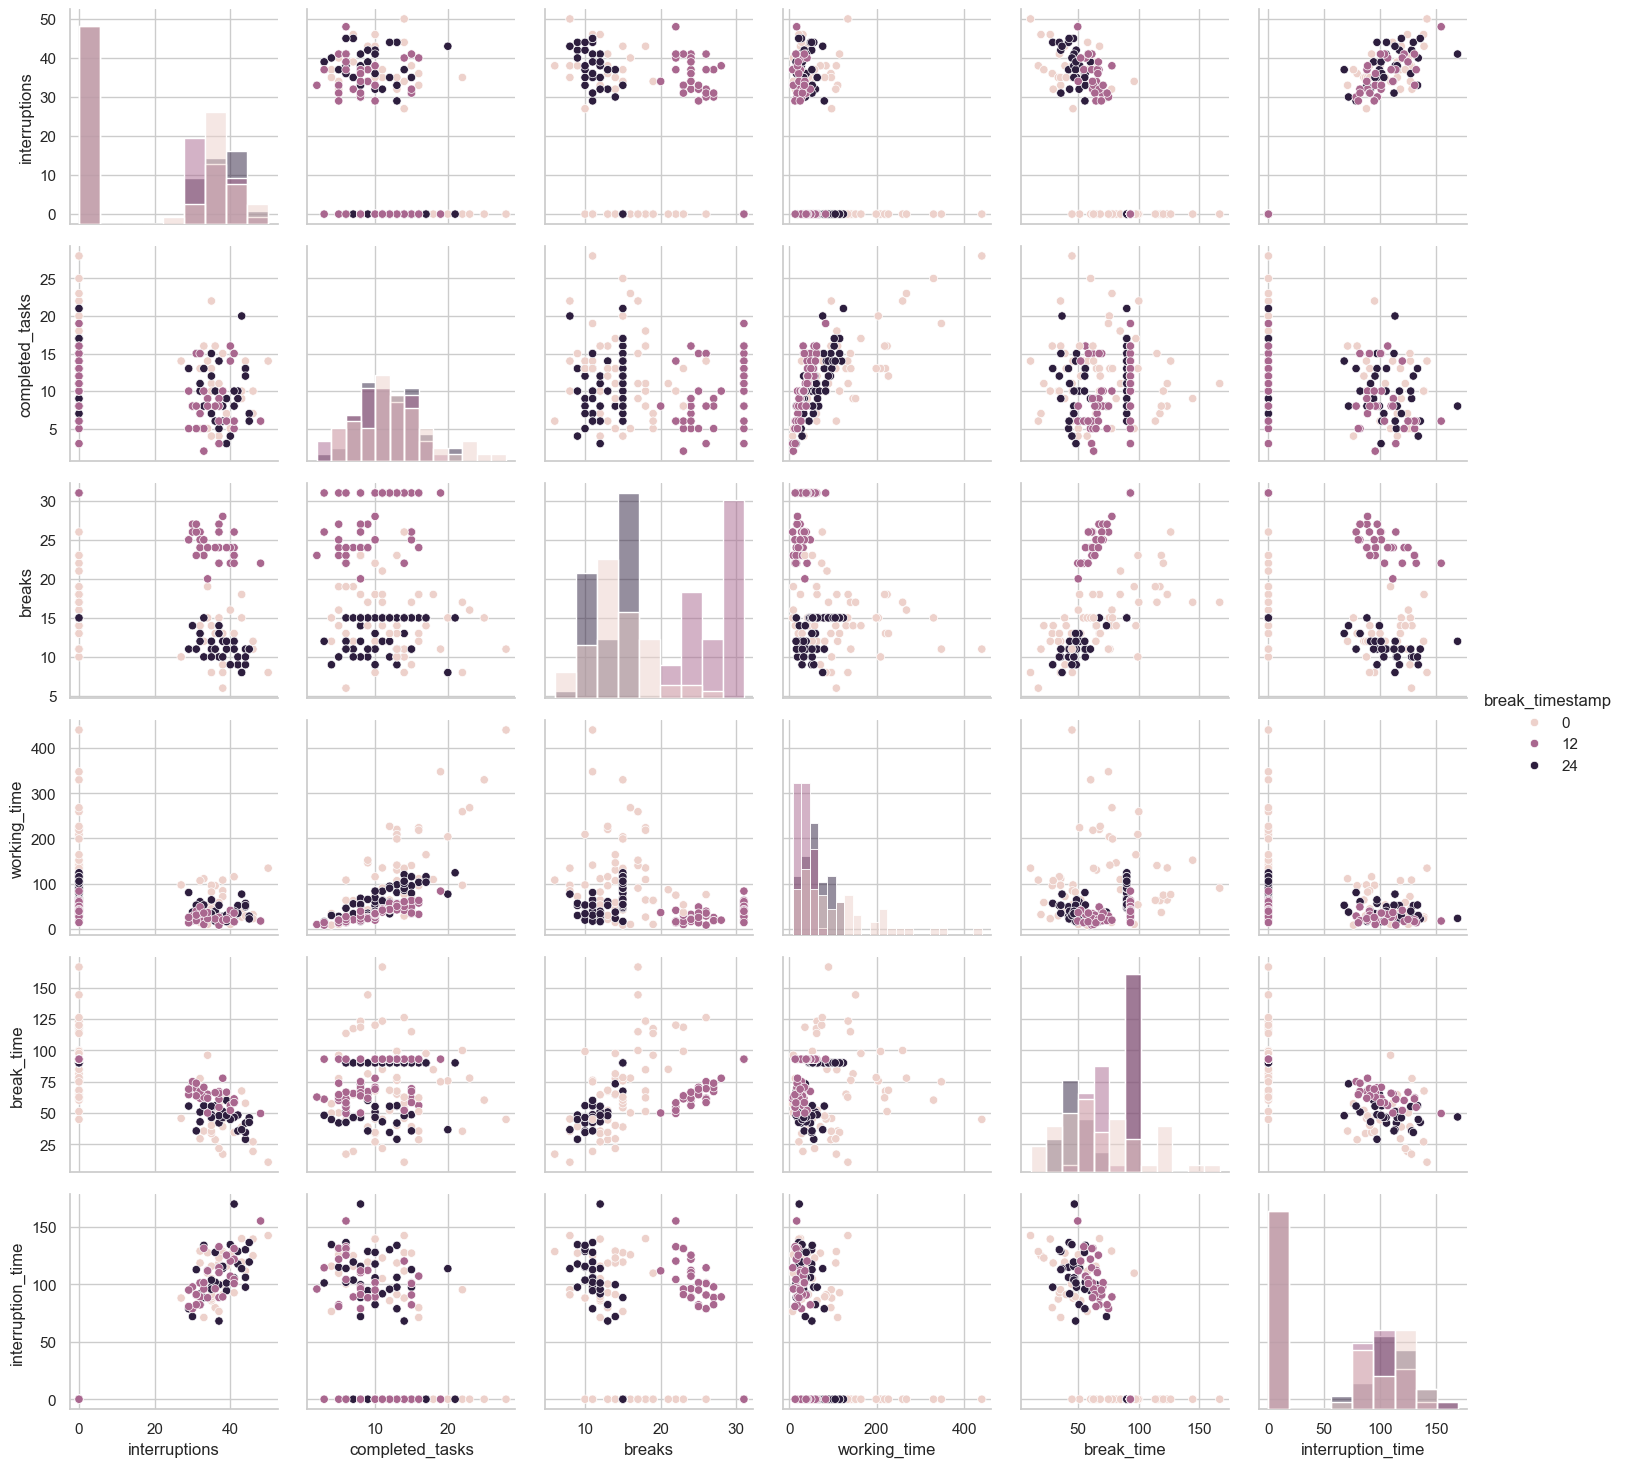

In [74]:

g = sns.PairGrid(df.iloc[:,1:-1], hue='break_timestamp')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

# df.iloc[:,1:]

## Pruebas de Hipótesis


## Preguntas

- Comparar que estrategia de administración de tiempo es mas productiva?
  - 24-6
  - 12-3
  - Free

- ¿Cuál es la distribución de la cantidad de tareas completadas en la ventana de tiempo de 480 minutos? Esto te permitiría entender cuánto varía el rendimiento de la persona.

- ¿Cómo afecta la duración de los descansos a la cantidad de tareas completadas? Podrías comparar las simulaciones con diferentes duraciones de descanso para ver si hay alguna diferencia significativa.


- ¿Cuál es la distribución del tiempo entre tareas completadas? Esto te permitiría entender cómo se distribuye el tiempo de trabajo de la persona.

- ¿Cómo se correlacionan el número de descansos y el número de tareas completadas? Esto podría ayudarte a entender si tomar más descansos lleva a completar más tareas.

### El efecto de las interrupciones

Es intuitivo pensar que las interrupciones pueden provocar una disminucion en el desempeño de una persona. Aunque en nuestra simulación no se tenga encuenta los efectos psicológicos de dichas perturbaciones, estas toman tiempo útil, por tanto podríamos preguntarnos **¿Cómo afectan las interrupciones a la cantidad de tareas completadas?**

Para responder esta interrogante hemos realizado las siguientes pruebas:
1. Prueba Kolmogorov-Smirnov: test no paramétrico de Bondad de Ajuste para verificar si las muestras provienen de poblaciones significativamente diferentes con respecto al tiempo trabajado.
2. Prueba Chi-Square se comprueba que la cantidad de tareas realizadas en ambas muestras es significativamente diferente.
3. Prueba de Mann-Whitney U (Wilcoxon Rank): prueba no paramétrica sobre las medianas de ambas muestras con hipótesis alternativa "menor que" ('less') para verificar cual de las dos es la menor. Este test es usado (y no t-test por ejemplo) dando que no podemos asumir que la variable en cuestión está normalmente distribuida, ni que las condiciones que garantizan el TCL se cumplen.

In [75]:

ks_statistic, p_value = st.ks_2samp(df_i['working_time'], df_ni['working_time'])

print(f"KS statistic: {ks_statistic}")
print(f"P-value: {p_value}")


KS statistic: 0.5666666666666667
P-value: 1.1402166999126312e-13


Dado que el p-value < $\alpha$ = 0.05 existe evidencia suficiente para rechazar la hipótesis nula, por tanto consideraremos que las dos muestras (el tiempo de trabajo con y sin interrupción) no siguen la misma distribución.

In [142]:

n = max(df_i['completed_tasks'].max(), df_ni['completed_tasks'].max())

fi  = np.zeros(n+1)
fni = np.zeros(n+1)

for k,v in df_i['completed_tasks'].value_counts().items():
    fi[k] = v

for k,v in df_ni['completed_tasks'].value_counts().items():
    fni[k] = v

chi2_statistic, p_value = st.chisquare(fi+1, f_exp=fni+1)

print(f"Chi-square statistic: {chi2_statistic}")
print(f"P-value: {p_value}")



Chi-square statistic: 84.87063492063493
P-value: 1.2293708524208996e-07


Dado que el p-value < $\alpha$ = 0.05 existe evidencia suficiente para rechazar la hipótesis nula, por tanto consideraremos que las dos muestras (la cantidad de tareas completadas y sin interrupción) no siguen la misma distribución.

In [77]:
# Realiza la prueba de Mann-Whitney U
u_statistic, p_value = st.mannwhitneyu(df_i['completed_tasks'], df_ni['completed_tasks'], alternative='less')

print(f"U statistic: {u_statistic}")
print(f"P-value: {p_value}")

U statistic: 2355.0
P-value: 5.777697356819142e-07


Dado que el p-value < $\alpha$ = 0.05 existe evidencia suficiente para rechazar la hipótesis nula, por tanto consideraremos la hipótesis alternativa: **es significativamente mayor la cantidad de tareas completadas si no la persona no es interrumpida a si lo es**.

### Distribución de Variables de Interés

In [81]:

# Estima los parámetros de la distribución exponencial a partir de los datos
loc, scale = st.expon.fit(df_ni['working_time'])

# Realiza el test de Kolmogorov-Smirnov
d_statistic, p_value = st.kstest(df_ni['working_time'], 'expon', args=(loc, scale))

print(f"D statistic: {d_statistic}")
print(f"P-value: {p_value}")

D statistic: 0.1653685334778826
P-value: 0.01279965090055779


In [80]:

# Estima los parámetros de la distribución exponencial a partir de los datos
loc, scale = st.expon.fit(df_i['working_time'])

# Realiza el test de Kolmogorov-Smirnov
d_statistic, p_value = st.kstest(df_i['working_time'], 'expon', args=(loc, scale))

print(f"D statistic: {d_statistic}")
print(f"P-value: {p_value}")


D statistic: 0.11833260286231194
P-value: 0.14830893127348665


In [83]:

# Estima los parámetros de la distribución exponencial a partir de los datos
loc, scale = st.expon.fit(df['working_time'])

# Realiza el test de Kolmogorov-Smirnov
d_statistic, p_value = st.kstest(df['working_time'], 'expon', args=(loc, scale))

print(f"D statistic: {d_statistic}")
print(f"P-value: {p_value}")

D statistic: 0.07143844233933919
P-value: 0.30270004669139094


In [116]:
# Asumiendo que 'data' es tu conjunto de datos
data = df['completed_tasks']

# Calcular las frecuencias observadas
observed_freqs = np.bincount(data)

# Estimar el parámetro lambda de la distribución de Poisson
lambda_ = data.mean()

# Calcular las frecuencias esperadas
expected_freqs = np.array([st.poisson.pmf(x, lambda_) for x in range(max(data) + 1)])
expected_freqs = (len(data)* poisson_pmf)

# Ajustar los valores teoricos de Poisson para que la cantidad de elementos de ambas muestras coincidan
ppmf_ = expected_freqs - np.floor(expected_freqs)
ppmf_ += ppmf_ < 0.5
expected_freqs = expected_freqs.round()
expected_freqs -= ppmf_ - ppmf_.min() < 1e-8

# # Realizar el test de Chi-cuadrado
chi2_statistic, p_value = st.chisquare(observed_freqs+1, f_exp=expected_freqs+1)

print(f"Chi-square statistic: {chi2_statistic}")
print(f"P-value: {p_value}")
print(expected_freqs.sum())
print(observed_freqs.sum())


Chi-square statistic: 36.51648629148629
P-value: 0.12991196102491728
180.0
180


### Mejor estrategia de administración

In [87]:
df_36_9_ni = simulate(30, 480, 36, 9, interruptions=False, likelihood=True) 
df_36_9_i = simulate(30, 480, 36, 9, interruptions=True, likelihood=True) 

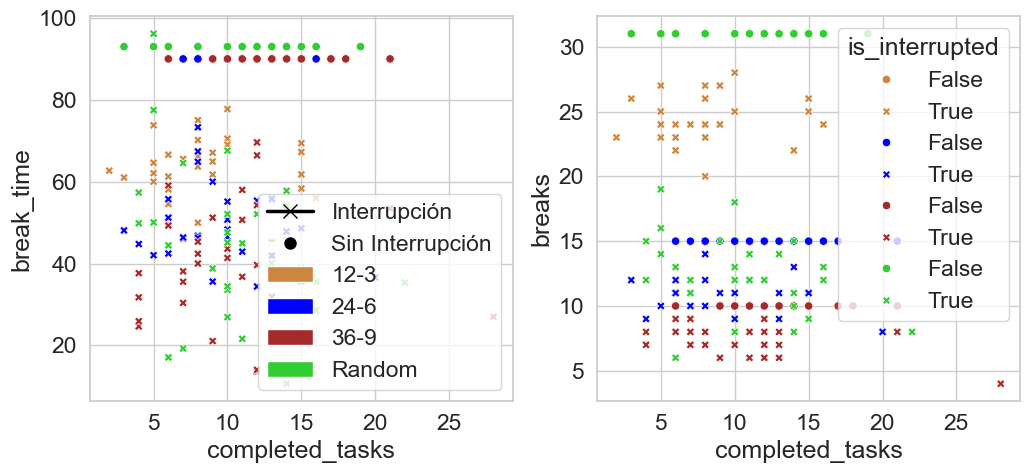

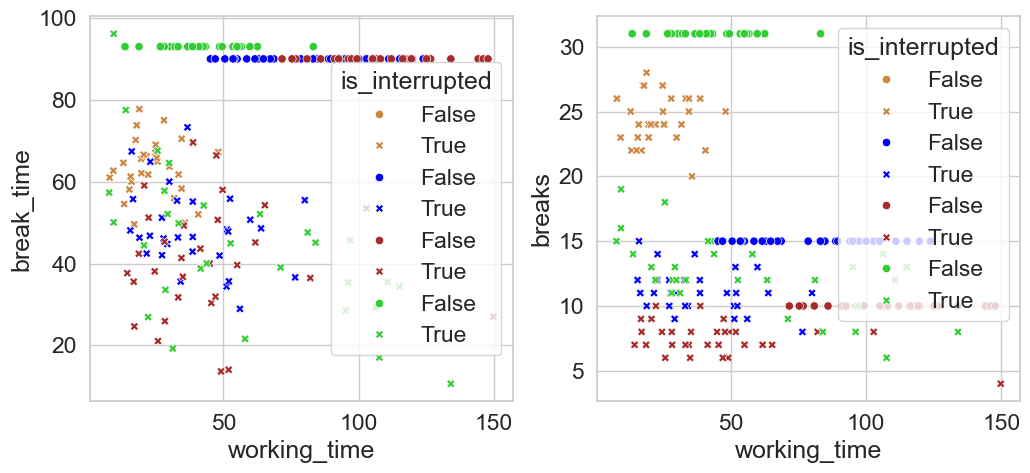

In [167]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = [
    Line2D([0], [0], color='black', marker='x', markersize=10, label='Interrupción'),
    Line2D([0], [0], color='w', markerfacecolor='black', marker='o', markersize=10, label='Sin Interrupción'),
    Patch(facecolor='peru', label='12-3'),
    Patch(facecolor='blue', label='24-6'),
    Patch(facecolor='brown', label='36-9'),
    Patch(facecolor='limegreen', label='Random'),
]
df_12_3 = pd.concat([df_12_3_i, df_12_3_ni])
df_24_6 = pd.concat([df_24_6_i, df_24_6_ni])
df_36_9 = pd.concat([df_36_9_i, df_36_9_ni])
df_rand = pd.concat([df_rand_i, df_12_3_ni])

df_12_3['is_interrupted'] = df_12_3['interruptions'] > 0
df_24_6['is_interrupted'] = df_24_6['interruptions'] > 0
df_36_9['is_interrupted'] = df_36_9['interruptions'] > 0
df_rand['is_interrupted'] = df_rand['interruptions'] > 0

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for data, color in zip([df_12_3, df_24_6, df_36_9, df_rand], ['peru', 'blue', 'brown', 'limegreen']):
    sns.scatterplot(data = data, x='completed_tasks', y='break_time', ax=ax[0], color=color, style='is_interrupted')
    sns.scatterplot(data = data, x='completed_tasks', y='breaks', ax=ax[1], color=color, style='is_interrupted')
    ax[0].legend(handles=legend_elements)
    ax[1].legend(handles=legend_elements)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for data, color in zip([df_12_3, df_24_6, df_36_9, df_rand], ['peru', 'blue', 'brown', 'limegreen']):
    sns.scatterplot(data = data, x='working_time', y='break_time', ax=ax[0], color=color, style='is_interrupted')
    sns.scatterplot(data = data, x='working_time', y='breaks', ax=ax[1], color=color, style='is_interrupted')
    ax[0].legend(handles=legend_elements)
    ax[1].legend(handles=legend_elements)
plt.show()

# print(df_12_3_ni.head())
# print(df_24_6_ni.head())


In [96]:
# Realiza la prueba de Kruskal-Wallis
h_statistic, p_value = st.kruskal(
    df_12_3['completed_tasks'], 
    df_24_6['completed_tasks'], 
    df_36_9['completed_tasks'], 
    df_rand['completed_tasks']
)

print(f"H statistic: {h_statistic}")
print(f"P-value: {p_value}")

H statistic: 2.2101407413817578
P-value: 0.5299537244303694


In [143]:
df.to_csv('data.csv', index=False)